# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

In [3]:
df = pd.read_csv('../data/MuziekWijn.csv')
df.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Give the names of both columns. What is wrong?

In [4]:
df.columns

Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`


Use this command to change the column name.  
Check afterwards if the result is correct.

In [6]:
df = df.rename(columns={' Wijn': 'Wijn'})
df.columns

Index(['Muziek', 'Wijn'], dtype='object')

1. Set up the correct crosstab.

In [7]:
pd.crosstab(df['Muziek'], df['Wijn'], margins=True)

Wijn,Andere,Franse,Italiaanse,All
Muziek,,,,
Franse,35,39,1,75
Geen,43,30,11,84
Italiaanse,35,30,19,84
All,113,99,31,243


2. Determine the marginal totals.

In [9]:
# Determine the marginal totals
marginal_totals = pd.crosstab(df['Muziek'], df['Wijn'], margins=True)
print(marginal_totals)

Wijn         Andere   Franse   Italiaanse  All
Muziek                                        
Franse           35       39            1   75
Geen             43       30           11   84
Italiaanse       35       30           19   84
All             113       99           31  243


3. Determine the expected results.

In [10]:
# Deterline the expected results
expected_results = pd.crosstab(df['Muziek'], df['Wijn'], margins=False).values
print(expected_results)

[[35 39  1]
 [43 30 11]
 [35 30 19]]


4. Calculate the χ² test statistic.

In [15]:
# Calculate the chi-square statistic
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(expected_results)
print(f"Chi-square statistic: {chi2_statistic:.3f}")
print(f"P-value: {p_value}")


Chi-square statistic: 18.279
P-value: 0.0010882801878574473


5. Calculate Cramér's V. What can you conclude from this?

In [16]:
# Calculate the Cramer's V 
cramers_v = np.sqrt(chi2_statistic / (df.shape[0] * (min(df['Muziek'].nunique(), df['Wijn'].nunique()) - 1)))
print(f"Cramer's V: {cramers_v:.3f}")

Cramer's V: 0.194


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

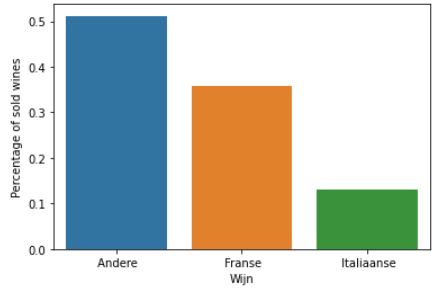

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17808\3169528638.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Wijn', y='Muziek', data=df[df['Muziek'] == 'Geen'],


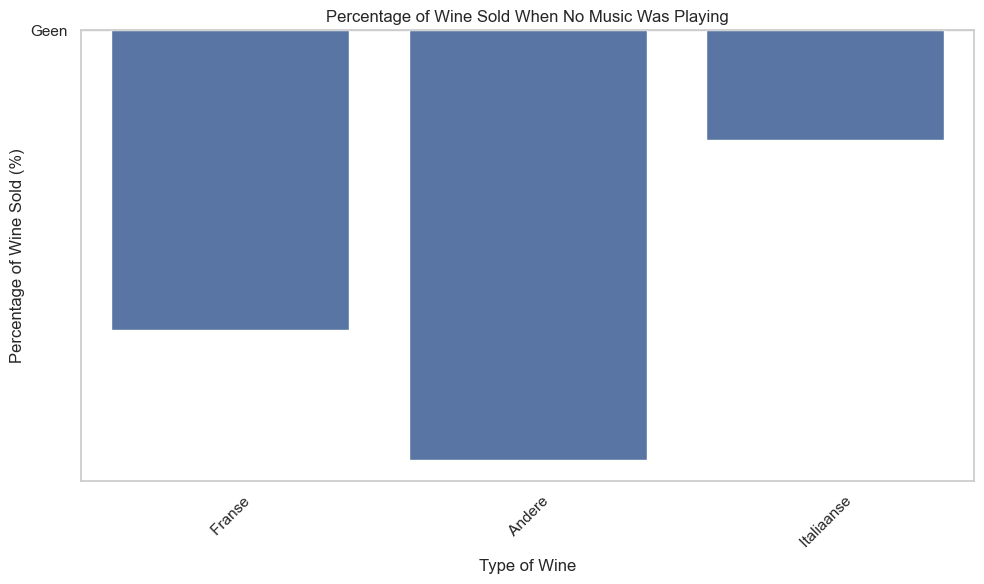

In [23]:
# Plot a bar chart showing the percentages of types of wine sold when no music was playing.
# x = wijn en y = percentage of wine sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Wijn', y='Muziek', data=df[df['Muziek'] == 'Geen'],
            estimator=lambda x: len(x) / len(df) * 100, ci=None)
plt.title('Percentage of Wine Sold When No Music Was Playing')
plt.xlabel('Type of Wine')
plt.ylabel('Percentage of Wine Sold (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

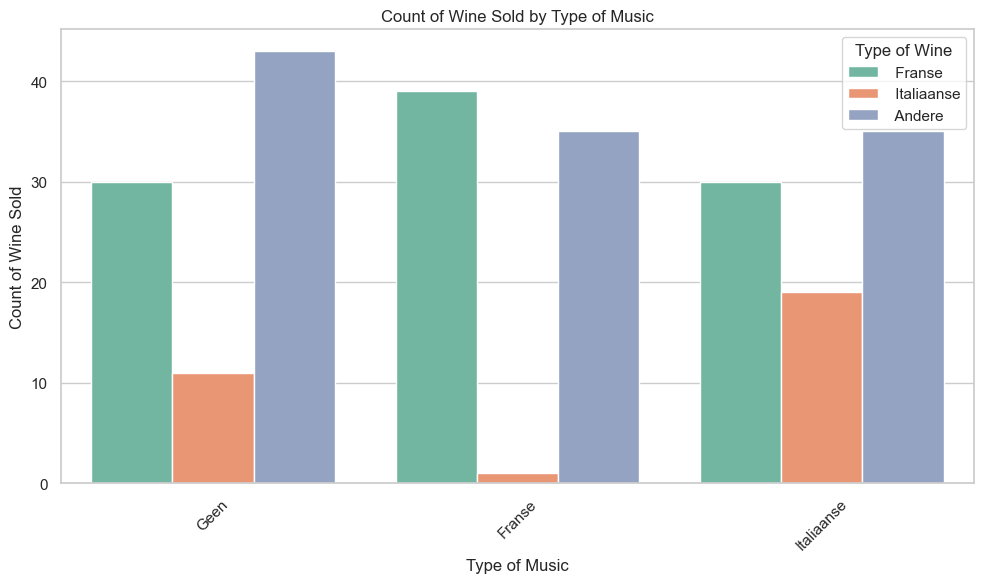

In [29]:
# plot a clustered bar chart of the dataset, x= muziek, y = count, colors are wijn (blauw oranje en groen)
plt.figure(figsize=(10, 6))
sns.countplot(x='Muziek', hue='Wijn', data=df, palette='Set2')
plt.title('Count of Wine Sold by Type of Music')
plt.xlabel('Type of Music')
plt.ylabel('Count of Wine Sold')
plt.legend(title='Type of Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot a clustered bar chart of the dataset  

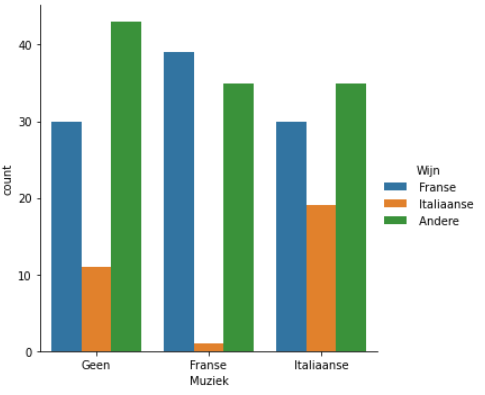

Plot a bar chart (stacked bar chart) of the dataset

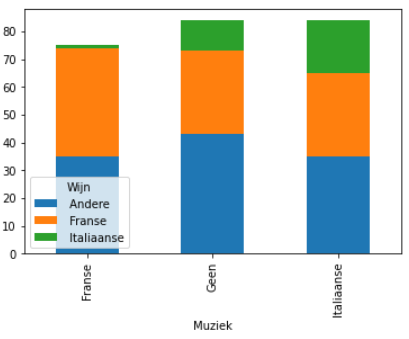

<Figure size 1000x600 with 0 Axes>

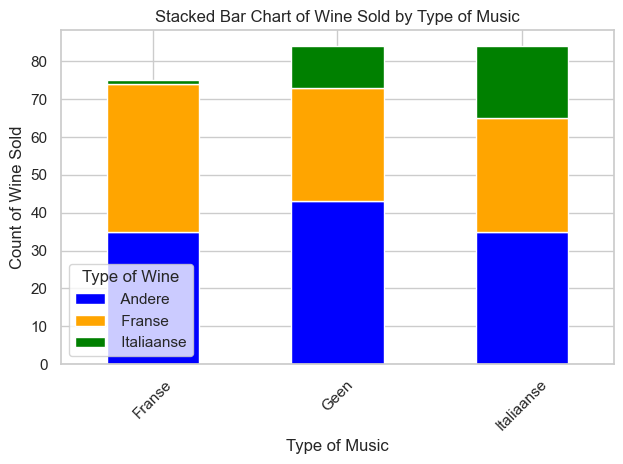

In [31]:
# Plot a bar chart(stacked bar chart) of the dataset, x= muziek, y = count, colors are wijn (blauw oranje en groen)
plt.figure(figsize=(10, 6))
df.groupby(['Muziek', 'Wijn']).size().unstack().plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Stacked Bar Chart of Wine Sold by Type of Music')
plt.xlabel('Type of Music')
plt.ylabel('Count of Wine Sold')
plt.xticks(rotation=45)
plt.legend(title='Type of Wine')
plt.tight_layout()
plt.show()